# This script combines all of the crops from the department of agriculture into one massive file

In [2]:
import pandas as pd
from bs4 import BeautifulSoup

In [3]:
def read_file(filename):
    # Read the file as text
    with open(filename, 'r', encoding='utf-8') as file:
        content = file.read()

    # Parse the HTML
    soup = BeautifulSoup(content, 'html.parser')
    table = soup.find('table')

    # Convert to pandas DataFrame
    df = pd.read_html(str(table))[0]

    # Clean up any potential messy data
    df = df.replace({r'\s+$': ''}, regex=True)  # Remove trailing whitespace
    df = df.replace({r'^\s+': ''}, regex=True)  # Remove leading whitespace

    return df

In [4]:
def restack(df):
    # Keep the first three columns as they are
    id_cols = df.iloc[:, :3].copy()  # State, District, Year
    id_cols.columns = ['State', 'District', 'Year']  # Flatten these column names

    # Get the measurement columns (everything except first three)
    measure_cols = df.iloc[:, 3:]

    # Stack only crop and season levels, keeping indicators as columns
    stacked = (measure_cols
        .stack(level=0, dropna=False)  # Stack first level (Crop)
        .stack(level=0, dropna=False)  # Stack second level (Season)
    )

    # Convert to DataFrame and reset index
    stacked_df = stacked.reset_index()

    # Rename the columns appropriately
    stacked_df = stacked_df.rename(columns={
        'level_1': 'Crop',
        'level_2': 'Season',
        0: 'Area (Hectare)',
        1: 'Production (Tonnes)',
        2: 'Yield (Tonne/Hectare)'
    })

    # Create final dataframe
    final_df = pd.concat([
        id_cols.loc[stacked_df['level_0']].reset_index(drop=True),
        stacked_df.drop('level_0', axis=1)
    ], axis=1)

    #Remove rows with all NaN values
    final_df = clean_df(final_df)

    # Sort the data
    final_df = final_df.sort_values(['State', 'District', 'Year', 'Crop', 'Season'])

    # Reset the index for clean output
    final_df = final_df.reset_index(drop=True)

    return final_df

In [5]:
def clean_df(df):
    # Remove rows where all values are missing
    # Keep only rows where at least one of Area, Production, or Yield is not NaN
    df = df.dropna(
        subset=['Area (Hectare)', 'Production (Tonnes)', 'Yield (Tonne/Hectare)'],
        how='all'
    )

    return df

In [151]:
path = '/Users/michaelfoley/Google Drive/My Drive/Subnational_Yield_Database/data/raw/IND/banana_arecanut_cardamom_coriander.xls'

In [152]:
df = read_file(path)
final_df = restack(df)

/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_71007/1378215583.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_71007/3153344820.py:11: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack(level=0, dropna=False)  # Stack first level (Crop)
/var/folders/16/y9h7_0ld1418y9zts1sf_3xh0000gn/T/ipykernel_71007/3153344820.py:12: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation a

In [153]:
final_df[(final_df['District'] == '1. Nicobars') & (final_df['Crop'] == 'Arecanut')]

,State,District,Year,Crop,Season,Area (Hectare),Production (Tonnes),Yield (Tonne/Hectare)
0,1. Andaman and Nicobar Islands,1. Nicobars,2000 - 2001,Arecanut,Kharif,1254.00,2000.00,1.59
2,1. Andaman and Nicobar Islands,1. Nicobars,2001 - 2002,Arecanut,Kharif,1254.00,2061.00,1.64
3,1. Andaman and Nicobar Islands,1. Nicobars,2002 - 2003,Arecanut,Whole Year,1258.00,2083.00,1.66
5,1. Andaman and Nicobar Islands,1. Nicobars,2003 - 2004,Arecanut,Whole Year,1261.00,1525.00,1.21
7,1. Andaman and Nicobar Islands,1. Nicobars,2004 - 2005,Arecanut,Whole Year,1264.70,805.85,0.64
9,1. Andaman and Nicobar Islands,1. Nicobars,2005 - 2006,Arecanut,Whole Year,795.67,NaN,0.00
11,1. Andaman and Nicobar Islands,1. Nicobars,2006 - 2007,Arecanut,Whole Year,896.00,477.60,0.53
13,1. Andaman and Nicobar Islands,1. Nicobars,2010 - 2011,Arecanut,Rabi,944.00,1610.00,1.71
15,1. Andaman and Nicobar Islands,1. Nicobars,2011 - 2012,Arecanut,Rabi,957.00,1090.00,1.14
17,1. Andaman and Nicobar Islands,1. Nicobars,2012 - 2013,Arecanut,Rabi,959.00,1361.80,1.42


# Modifications to make
- Year -> DNL Source Year
- Take first year of range and make it the 'Year' column (except maybe for summer? ask Gary)
- Remove numbers from State and District Columns
- State -> Admin 1 and District -> Admin 2 (with state initials in parentheses)
- Add start and end periods
    - Kharif = 6/1 - 9/30
    - Autumn = 9/1 - 10/31
    - Rabi = 10/1 - 1/31
    - Winter = 12/15 - 3/15
    - Summer = 3/15 - 5/31
    - Whole Year = self explanatory (but ask Gary about year)
- Add crop codes
- Add production style (all for everything)
- Crop -> Source Crop
- Area (hectare) -> Area Harvested: ha
- Yield (Tonne/ha) -> Yield: MT/ha
- Production (Tonnes) -> Quantity Produced: MT
- Area Planted = NA
- Data Source Organization = MoA & FW, India
- Data Source Document = Official agricultural statistics, India, crop
- Publication Name = https://data.desagri.gov.in/website/crops-apy-report-web, extracted Feb 2025, India
- Survey Type = crop_final
- Country = IN
- FNID = (leave blank for now I think)

    


# First we will change the existing columns so that we can look for duplicates within the file Gary provided

In [154]:
#First we rename the Area, Yield, and Production columns
final_df.rename(columns={'Area (Hectare)': 'Area Harvested: ha', 'Production (Tonnes)': 'Quantity Produced: MT', 'Yield (Tonne/Hectare)': 'Yield: MT/ha'}, inplace=True)

In [155]:
#Fix numbers in state and district columns
final_df['State'] = final_df['State'].str.split('.', n=1).str[1].str.strip()
final_df['District'] = final_df['District'].str.split('.', n=1).str[1].str.strip()

In [156]:
#Establish source year column
final_df['DNL_Source_year'] = final_df['Year'].str.replace(' ','')
final_df['Year'] = final_df['Year'].str.split('-', n=1).str[0].str.strip()


In [6]:
#Load in full data and see how much overlap there is
ag_stats = pd.read_excel('/Users/michaelfoley/Google Drive/My Drive/Subnational_Yield_Database/data/processed/IND/IN_AgStats_Current.xlsx') 

In [9]:
ag_stats['Year']

0         2000
1         2002
2         2004
3         2003
4         2001
          ... 
583803    2022
583804    2022
583805    2022
583806    2022
583807    2022
Name: Year, Length: 583808, dtype: int64

(array([ 18961.,  19569.,   9881.,  20457.,  13681.,  25088.,  19687.,
         10267.,  20766.,  10404.,  21894.,  22318.,  11975.,  25245.,
         13112.,  26452.,  29171.,  14995.,  83583., 166302.]),
 array([1990. , 1991.6, 1993.2, 1994.8, 1996.4, 1998. , 1999.6, 2001.2,
        2002.8, 2004.4, 2006. , 2007.6, 2009.2, 2010.8, 2012.4, 2014. ,
        2015.6, 2017.2, 2018.8, 2020.4, 2022. ]),
 <BarContainer object of 20 artists>)

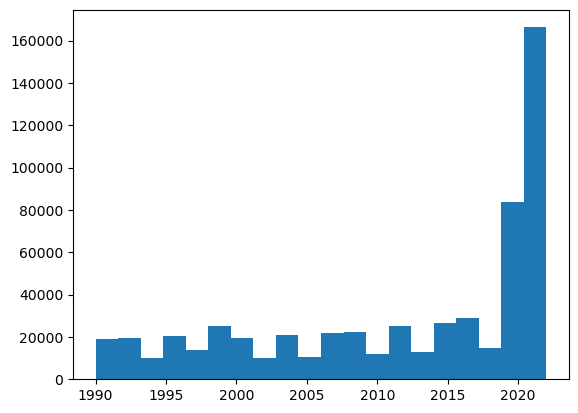

In [10]:
import matplotlib.pyplot as plt
plt.hist(ag_stats['Year'], bins=20)

# Now we will change the state and district names to match

In [158]:
ag_stats['Admin 1'].unique(), final_df['State'].unique()

(array(['Andaman and Nicobar', 'Andaman and Nicobar Islands',
        'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
        'Chandigarh', 'Chhattisgarh', 'Goa', 'Dadra and Nagar Haveli',
        'Daman and Diu', 'Dadra and Nagar Haveli and Daman and Diu',
        'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
        'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
        'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
        'National Capital Territory (NCT) of Delhi', 'Odisha', 'Orissa',
        'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
        'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
        'Uttaranchal', 'West Bengal'], dtype=object),
 array(['Andaman and Nicobar Islands', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
        'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
        'Nagaland', 'Andhra Pradesh', 'Odisha', 'Puducherry', 'Rajastha

In [159]:
ag_stats['Admin 1'] = ag_stats['Admin 1'].replace('Andaman and Nicobar', 'Andaman and Nicobar Islands')

In [160]:
abbr_map = {
    'Andhra Pradesh': '(AP)',
    'Arunachal Pradesh': '(AR)',
    'Assam': '(AS)',
    'Bihar': '(BR)',
    'Chhattisgarh': '(CG)',
    'Goa': '(GA)',
    'Gujarat': '(GJ)',
    'Haryana': '(HR)',
    'Himachal Pradesh': '(HP)',
    'Jharkhand': '(JH)',
    'Karnataka': '(KA)',
    'Kerala': '(KL)',
    'Madhya Pradesh': '(MP)',
    'Maharashtra': '(MH)',
    'Manipur': '(MN)',
    'Meghalaya': '(ML)',
    'Mizoram': '(MZ)',
    'Nagaland': '(NL)',
    'Odisha': '(OD)',
    'Punjab': '(PB)',
    'Rajasthan': '(RJ)',
    'Sikkim': '(SK)',
    'Tamil Nadu': '(TN)',
    'Telangana': '(TG)',
    'Tripura': '(TR)',
    'Uttar Pradesh': '(UP)',
    'Uttarakhand': '(UK)',
    'West Bengal': '(WB)',
    'Andaman and Nicobar Islands': '(AN)',
    'Chandigarh': '(CH)',
    'Dadra and Nagar Haveli and Daman and Diu': '(DD)',
    'Dadra and Nagar Haveli': '(DN)',
    'Daman and Diu': '(DA)',
    'Delhi': '(DL)',
    'Ladakh': '(LA)',
    'Lakshadweep': '(LD)',
    'Puducherry': '(PY)'
}

In [161]:
final_df['District'] = final_df['District'] + ' ' + final_df['State'].map(abbr_map)

# Checking which rows overlap with the current data

In [162]:
# Create a copy of the dataframes with just the columns we care about
# and standardize the column names
main_cols = {
    'Admin 1': 'state',
    'Admin 2': 'district',
    'Year': 'year',
    'Source crop': 'crop',
    'Season': 'season',
    'Area Harvested: ha': 'area',
    'Yield: MT/ha': 'yield',
    'Quantity Produced: MT': 'production'
}

test_cols = {
    'State': 'state',
    'District': 'district',
    'Year': 'year',
    'Crop': 'crop',
    'Season': 'season',
    'Area Harvested: ha': 'area',
    'Yield: MT/ha': 'yield',
    'Quantity Produced: MT': 'production'
}

In [163]:
main_compare = ag_stats[main_cols.keys()].rename(columns=main_cols)
test_compare = final_df[test_cols.keys()].rename(columns=test_cols)

In [164]:
# Convert types in main dataframe
main_compare['state'] = main_compare['state'].astype(str)
main_compare['district'] = main_compare['district'].astype(str)
main_compare['year'] = main_compare['year'].astype(str)
main_compare['area'] = pd.to_numeric(main_compare['area'], errors='coerce').round(2)
main_compare['yield'] = pd.to_numeric(main_compare['yield'], errors='coerce').round(2)
main_compare['production'] = pd.to_numeric(main_compare['production'], errors='coerce').round(2)

# Convert year in test dataframe (already float for others)
test_compare['state'] = test_compare['state'].astype(str)
test_compare['district'] = test_compare['district'].astype(str)
test_compare['year'] = test_compare['year'].astype(str)
test_compare['area'] = test_compare['area'].round(2)
test_compare['yield'] = test_compare['yield'].round(2)
test_compare['production'] = test_compare['production'].round(2)

In [165]:
# Now try the merge
matches = test_compare.merge(
    main_compare, 
    on=['state', 'district', 'year', 'crop', 'season', 'area', 'yield', 'production'],
    indicator=True,
    how='left'
)

In [166]:
# Count matches and non-matches
match_stats = matches['_merge'].value_counts()

print("\nResults:")
print(f"Total rows in test dataset: {len(test_compare)}")
print(f"Number of matching rows: {sum(matches['_merge'] == 'both')}")
print(f"Number of non-matching rows: {sum(matches['_merge'] == 'left_only')}")
print(f"Percentage of test rows found in main dataset: {(sum(matches['_merge'] == 'both') / len(test_compare)) * 100:.2f}%")


Results:
Total rows in test dataset: 14141
Number of matching rows: 1012
Number of non-matching rows: 13129
Percentage of test rows found in main dataset: 7.16%


In [167]:
test_compare[(test_compare['state'] == 'Andaman and Nicobar Islands') & (test_compare['district'] == 'Nicobars (AN)') & (test_compare['crop'] == 'Arecanut') & 
(test_compare['season'] == 'Rabi')].sort_values('year')

,state,district,year,crop,season,area,yield,production
13,Andaman and Nicobar Islands,Nicobars (AN),2010,Arecanut,Rabi,944.0,1.71,1610.00
15,Andaman and Nicobar Islands,Nicobars (AN),2011,Arecanut,Rabi,957.0,1.14,1090.00
17,Andaman and Nicobar Islands,Nicobars (AN),2012,Arecanut,Rabi,959.0,1.42,1361.80
19,Andaman and Nicobar Islands,Nicobars (AN),2013,Arecanut,Rabi,890.5,0.95,846.00
21,Andaman and Nicobar Islands,Nicobars (AN),2014,Arecanut,Rabi,876.5,0.73,638.50
23,Andaman and Nicobar Islands,Nicobars (AN),2015,Arecanut,Rabi,888.5,0.09,82.50
25,Andaman and Nicobar Islands,Nicobars (AN),2016,Arecanut,Rabi,888.5,0.11,99.00
27,Andaman and Nicobar Islands,Nicobars (AN),2017,Arecanut,Rabi,534.1,0.23,125.23
29,Andaman and Nicobar Islands,Nicobars (AN),2018,Arecanut,Rabi,558.0,0.15,84.60
31,Andaman and Nicobar Islands,Nicobars (AN),2019,Arecanut,Rabi,612.5,0.29,175.40


In [168]:
main_compare[(main_compare['state'] == 'Andaman and Nicobar Islands') & (main_compare['district'] == 'Nicobars (AN)') & (main_compare['crop'] == 'Arecanut') & 
(main_compare['season'] == 'Rabi')].sort_values('year')

,state,district,year,crop,season,area,yield,production
62,Andaman and Nicobar Islands,Nicobars (AN),2010,Arecanut,Rabi,944.0,1.71,1610.0
61,Andaman and Nicobar Islands,Nicobars (AN),2011,Arecanut,Rabi,957.0,1.14,1090.0
60,Andaman and Nicobar Islands,Nicobars (AN),2012,Arecanut,Rabi,959.0,1.42,1362.0
65,Andaman and Nicobar Islands,Nicobars (AN),2013,Arecanut,Rabi,890.5,0.95,846.0
69,Andaman and Nicobar Islands,Nicobars (AN),2014,Arecanut,Rabi,876.5,0.73,639.0
66,Andaman and Nicobar Islands,Nicobars (AN),2015,Arecanut,Rabi,888.5,0.09,83.0
67,Andaman and Nicobar Islands,Nicobars (AN),2016,Arecanut,Rabi,888.5,0.11,99.0
87,Andaman and Nicobar Islands,Nicobars (AN),2017,Arecanut,Rabi,534.1,0.23,125.0
85,Andaman and Nicobar Islands,Nicobars (AN),2018,Arecanut,Rabi,558.0,0.15,85.0
81,Andaman and Nicobar Islands,Nicobars (AN),2019,Arecanut,Rabi,612.5,0.29,175.0


In [169]:
columns_to_check = ['area', 'production', 'yield']

main_compare.drop(main_compare[main_compare[columns_to_check].eq(0).all(axis=1)].index, inplace=True)

Turns out not a lot. And actually in the ones that don't match perfectly, I think there are some errors in Gary's data. Taking mine seems better. Let's now match the format to prepare to combine the data. We will only match state, distric, year, crop, season, and then take my numbers for everything.

# Modifications to make
- Add start and end periods
    - Kharif = 6/1 - 9/30
    - Autumn = 9/1 - 10/31
    - Rabi = 10/1 - 1/31
    - Winter = 12/15 - 3/15
    - Summer = 3/15 - 5/31
    - Whole Year = self explanatory (but ask Gary about year)
- Add crop codes
- Add production style (all for everything)
- Crop -> Source Crop
- Area (hectare) -> Area Harvested: ha
- Yield (Tonne/ha) -> Yield: MT/ha
- Production (Tonnes) -> Quantity Produced: MT
- Area Planted = NA
- Data Source Organization = MoA & FW, India
- Data Source Document = Official agricultural statistics, India, crop
- Publication Name = https://data.desagri.gov.in/website/crops-apy-report-web, extracted Feb 2025, India
- Survey Type = crop_final
- Country = IN
- FNID = (leave blank for now I think)

In [170]:
final_df.rename(columns={'State': 'Admin 1', 'District': 'Admin 2'}, inplace=True)

In [171]:
final_df['Admin 3'] = ''
final_df['Country'] = 'IN'
final_df['Survey Type'] ='crop_final'
final_df['Data Source Organization'] = 'MoA & FW, India'
final_df['Data Source Document'] = 'Official agricultural statistics, India, crop'
final_df['Publication Name'] = 'https://data.desagri.gov.in/website/crops-apy-report-web, extracted Feburary 2025, India'
final_df['FNID'] = ''
final_df['Dominant Production System'] = 'All (PS)'
final_df['Area Planted: ha'] = 'NA'
final_df['Contributions by'] = 'Harvard'
final_df['Start Period'] = ''
final_df['End Period'] = ''

In [172]:
final_df.rename(columns={'Crop': 'Source crop'}, inplace=True)
final_df['Crop'] = ''
final_df['Zone'] = ''

In [173]:
final_df = final_df.loc[:, ['Data Source Organization', 'Data Source Document', 'Publication Name',
'Survey Type', 'Country', 'Zone', 'FNID', 'Admin 1', 'Admin 2', 'Admin 3', 'Year', 'Start Period', 'Season', 'End Period',
'Crop', 'Dominant Production System', 'Area Planted: ha', 'Area Harvested: ha', 'Yield: MT/ha', 'Quantity Produced: MT', 
'Contributions by', 'Source crop', 'DNL_Source_year']]

In [174]:
final_df

,Data Source Organization,Data Source Document,Publication Name,Survey Type,Country,Zone,FNID,Admin 1,Admin 2,Admin 3,...,End Period,Crop,Dominant Production System,Area Planted: ha,Area Harvested: ha,Yield: MT/ha,Quantity Produced: MT,Contributions by,Source crop,DNL_Source_year
0,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Andaman and Nicobar Islands,Nicobars (AN),,...,,,All (PS),NA,1254.0,1.59,2000.0,Harvard,Arecanut,2000-2001
1,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Andaman and Nicobar Islands,Nicobars (AN),,...,,,All (PS),NA,176.0,3.64,641.0,Harvard,Banana,2000-2001
2,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Andaman and Nicobar Islands,Nicobars (AN),,...,,,All (PS),NA,1254.0,1.64,2061.0,Harvard,Arecanut,2001-2002
3,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Andaman and Nicobar Islands,Nicobars (AN),,...,,,All (PS),NA,1258.0,1.66,2083.0,Harvard,Arecanut,2002-2003
4,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Andaman and Nicobar Islands,Nicobars (AN),,...,,,All (PS),NA,213.0,6.00,1278.0,Harvard,Banana,2002-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14136,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,,All (PS),NA,138.0,0.99,136.0,Harvard,Coriander,2016-2017
14137,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,,All (PS),NA,258.0,1.99,513.0,Harvard,Coriander,2017-2018
14138,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,,All (PS),NA,300.0,0.79,236.0,Harvard,Coriander,2018-2019
14139,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,,All (PS),NA,300.0,1.03,310.0,Harvard,Coriander,2019-2020


# Add in season information

In [175]:
# Convert Year to integer, handling any potential issues
final_df['Year'] = pd.to_numeric(final_df['Year'], errors='coerce')

# Clean up Season column - strip whitespace and convert to lowercase
final_df['Season'] = final_df['Season'].str.strip().str.title()

# Now let's verify our data looks correct
print("Unique seasons:", final_df['Season'].unique())
print("\nYear range:", final_df['Year'].min(), "to", final_df['Year'].max())

Unique seasons: ['Kharif' 'Whole Year' 'Rabi' 'Autumn' 'Winter' 'Summer']

Year range: 1997 to 2022


In [176]:
# Kharif = 6/1 - 9/30
# - Autumn = 9/1 - 10/31
# - Rabi = 10/1 - 1/31
# - Winter = 12/15 - 3/15
# - Summer = 3/15 - 5/31
season_dates = {
    'Summer': {'start_month': 3, 'start_day': 15, 'end_month': 5, 'end_day': 31},
    'Winter': {'start_month': 12, 'start_day': 15, 'end_month': 3, 'end_day': 15},  # example
    'Rabi': {'start_month': 10, 'start_day': 1, 'end_month': 1, 'end_day': 31},    # example
    'Kharif': {'start_month': 6, 'start_day': 1, 'end_month': 9, 'end_day': 30},   # example
    'Autumn': {'start_month': 9, 'start_day': 1, 'end_month': 10, 'end_day': 31},  # example
    'Whole Year': {'start_month': 1, 'start_day': 1, 'end_month': 12, 'end_day': 31}
}

In [181]:
# Function to create date based on year and season
def get_period_dates(row):
    year = int(row['Year'])
    season = row['Season'].strip().title()
    
    season_info = season_dates[season]
    
    start_date = pd.Timestamp(
        year=year,
        month=season_info['start_month'],
        day=season_info['start_day']
    ).strftime('%-m/%-d/%Y')  # formats as m/d/yyyy without leading zeros
    
    end_year = year + 1 if season == 'Winter' and season_info['end_month'] < season_info['start_month'] else year
    
    end_date = pd.Timestamp(
        year=end_year,
        month=season_info['end_month'],
        day=season_info['end_day']
    ).strftime('%-m/%-d/%Y')
    
    return pd.Series({'Start Period': start_date, 'End Period': end_date})

# Apply the function to create new columns
final_df[['Start Period', 'End Period']] = final_df.apply(get_period_dates, axis=1)

In [182]:
final_df[final_df['Season'] == 'Winter'][['Start Period', 'End Period', 'Year', 'Season']]

,Start Period,End Period,Year,Season
4076,12/15/1998,3/15/1999,1998,Winter
4101,12/15/1998,3/15/1999,1998,Winter
4126,12/15/1998,3/15/1999,1998,Winter
4172,12/15/1998,3/15/1999,1998,Winter
4197,12/15/1998,3/15/1999,1998,Winter
4238,12/15/1998,3/15/1999,1998,Winter
13644,12/15/1998,3/15/1999,1998,Winter
13645,12/15/1998,3/15/1999,1998,Winter


# Now we merge with the main table

In [187]:
# First, let's create a list of columns to check for duplicates
check_columns = ['Admin 1', 'Admin 2', 'Year', 'Source crop', 'Season']
                # 'Area Harvested: ha', 'Yield: MT/ha', 'Quantity Produced: MT']
                #Decided not to check on data because I noticed some discrepancies. My numbers seem more accurate, so we will only take mine.

In [188]:
# Convert types in main dataframe
final_df['Year'] = final_df['Year'].astype(str)
final_df['Area Harvested: ha'] = pd.to_numeric(final_df['Area Harvested: ha'], errors='coerce').round(2)
final_df['Yield: MT/ha'] = pd.to_numeric(final_df['Yield: MT/ha'], errors='coerce').round(2)
final_df['Quantity Produced: MT'] = pd.to_numeric(final_df['Quantity Produced: MT'], errors='coerce').round(2)

# Convert year in test dataframe (already float for others)
ag_stats['Year'] = ag_stats['Year'].astype(str)
ag_stats['Area Harvested: ha'] = pd.to_numeric(ag_stats['Area Harvested: ha'], errors='coerce').round(2)
ag_stats['Yield: MT/ha'] = pd.to_numeric(ag_stats['Yield: MT/ha'], errors='coerce').round(2)
ag_stats['Quantity Produced: MT'] = pd.to_numeric(ag_stats['Quantity Produced: MT'], errors='coerce').round(2)

In [189]:
# Now try the merge
matches = final_df.merge(
    ag_stats, 
    on=check_columns,
    indicator=True,
    how='left'
)

In [190]:
# Count matches and non-matches
match_stats = matches['_merge'].value_counts()

print("\nResults:")
print(f"Total rows in test dataset: {len(final_df)}")
print(f"Number of matching rows: {sum(matches['_merge'] == 'both')}")
print(f"Number of non-matching rows: {sum(matches['_merge'] == 'left_only')}")
print(f"Percentage of test rows found in main dataset: {(sum(matches['_merge'] == 'both') / len(final_df)) * 100:.2f}%")


Results:
Total rows in test dataset: 14141
Number of matching rows: 1090
Number of non-matching rows: 13051
Percentage of test rows found in main dataset: 7.71%


In [203]:
matches[matches['_merge'] == 'both']['Source crop'].unique()

array(['Arecanut', 'Coriander', 'Banana'], dtype=object)

In [192]:
#Combine and drop duplicates that match in that subset
combined_df = pd.concat([ag_stats, final_df], ignore_index=True)
combined_df = combined_df.drop_duplicates(subset=check_columns, keep='last')

In [193]:
combined_df

,Data Source Organization,Data Source Document,Publication Name,Survey Type,Country,Zone,FNID,Admin 1,Admin 2,Admin 3,...,Crop,Dominant Production System,Area Planted: ha,Area Harvested: ha,Yield: MT/ha,Quantity Produced: MT,Contributions by,Source crop,DNL_Source_year,Unnamed: 23
0,"MoA & FW, India","Official agricultural statistics, India, crop","https://aps.dac.gov.in, September, 2024, India",crop_final,IN,NaN,IN2000A20101,Andaman and Nicobar Islands,Andaman (AN),,...,R01132AA,All (PS),NaN,10779.00,2.96,31863.0,NaN,Rice,2000-01,NaN
1,"MoA & FW, India","Official agricultural statistics, India, crop","https://aps.dac.gov.in, September, 2024, India",crop_final,IN,NaN,IN2006A20104,Andaman and Nicobar Islands,South Andamans (AN),,...,R01132AA,All (PS),NaN,10695.80,2.95,31601.0,NaN,Rice,2002-03,NaN
2,"MoA & FW, India","Official agricultural statistics, India, crop","https://aps.dac.gov.in, September, 2024, India",crop_final,IN,NaN,IN2006A20104,Andaman and Nicobar Islands,South Andamans (AN),,...,R01132AA,All (PS),NaN,10681.98,2.73,29120.0,NaN,Rice,2004-05,NaN
3,"MoA & FW, India","Official agricultural statistics, India, crop","https://aps.dac.gov.in, September, 2024, India",crop_final,IN,NaN,IN2006A20104,Andaman and Nicobar Islands,South Andamans (AN),,...,R01132AA,All (PS),NaN,10509.37,2.93,30761.0,NaN,Rice,2003-04,NaN
4,"MoA & FW, India","Official agricultural statistics, India, crop","https://aps.dac.gov.in, September, 2024, India",crop_final,IN,NaN,IN2001A20101,Andaman and Nicobar Islands,Andaman (AN),,...,R01132AA,All (PS),NaN,9718.00,2.78,27033.0,NaN,Rice,2001-02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597944,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,All (PS),NA,138.00,0.99,136.0,Harvard,Coriander,2016-2017,NaN
597945,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,All (PS),NA,258.00,1.99,513.0,Harvard,Coriander,2017-2018,NaN
597946,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,All (PS),NA,300.00,0.79,236.0,Harvard,Coriander,2018-2019,NaN
597947,"MoA & FW, India","Official agricultural statistics, India, crop",https://data.desagri.gov.in/website/crops-apy-...,crop_final,IN,,,Haryana,Jind (HR),,...,,All (PS),NA,300.00,1.03,310.0,Harvard,Coriander,2019-2020,NaN


In [195]:
combined_df.to_csv('ag_stats_with_banana_arecanut_cardamom_coriander.csv', index=False)